In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset,DataLoader
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
import timm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd



In [2]:
print(torch.__version__)
print(torch.cuda.is_available())

2.3.1+cu118
True


In [3]:
import zipfile as zf
files =zf.ZipFile("Cards_dataset.zip",'r')
files.extractall('pytorch_cards')

In [4]:
class PlayingCards(Dataset):
    def __init__(self,data_dir,transform = None):
        self.data = ImageFolder(data_dir,transform=transform)
        
    def __len__(self):
        return len(self.data)
    def __getitem__(self,idx):
        return self.data[idx]
    def classes(self):
        return self.data.classes
        
    

In [5]:
Dir = 'pytorch_cards/train'
dataset = PlayingCards(Dir)

In [6]:
len(dataset)

7624

In [7]:
dataset.classes()

['ace of clubs',
 'ace of diamonds',
 'ace of hearts',
 'ace of spades',
 'eight of clubs',
 'eight of diamonds',
 'eight of hearts',
 'eight of spades',
 'five of clubs',
 'five of diamonds',
 'five of hearts',
 'five of spades',
 'four of clubs',
 'four of diamonds',
 'four of hearts',
 'four of spades',
 'jack of clubs',
 'jack of diamonds',
 'jack of hearts',
 'jack of spades',
 'joker',
 'king of clubs',
 'king of diamonds',
 'king of hearts',
 'king of spades',
 'nine of clubs',
 'nine of diamonds',
 'nine of hearts',
 'nine of spades',
 'queen of clubs',
 'queen of diamonds',
 'queen of hearts',
 'queen of spades',
 'seven of clubs',
 'seven of diamonds',
 'seven of hearts',
 'seven of spades',
 'six of clubs',
 'six of diamonds',
 'six of hearts',
 'six of spades',
 'ten of clubs',
 'ten of diamonds',
 'ten of hearts',
 'ten of spades',
 'three of clubs',
 'three of diamonds',
 'three of hearts',
 'three of spades',
 'two of clubs',
 'two of diamonds',
 'two of hearts',
 'two o

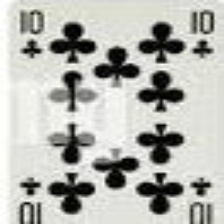

In [8]:
image,label = dataset[6000]
image

In [9]:
target_to_class = {k:v for k,v in enumerate(dataset.classes())}
#or
# target_to_class = {v:k for k,v in ImageFolder(Dir).class_to_idx.items()}

In [10]:
target_to_class

{0: 'ace of clubs',
 1: 'ace of diamonds',
 2: 'ace of hearts',
 3: 'ace of spades',
 4: 'eight of clubs',
 5: 'eight of diamonds',
 6: 'eight of hearts',
 7: 'eight of spades',
 8: 'five of clubs',
 9: 'five of diamonds',
 10: 'five of hearts',
 11: 'five of spades',
 12: 'four of clubs',
 13: 'four of diamonds',
 14: 'four of hearts',
 15: 'four of spades',
 16: 'jack of clubs',
 17: 'jack of diamonds',
 18: 'jack of hearts',
 19: 'jack of spades',
 20: 'joker',
 21: 'king of clubs',
 22: 'king of diamonds',
 23: 'king of hearts',
 24: 'king of spades',
 25: 'nine of clubs',
 26: 'nine of diamonds',
 27: 'nine of hearts',
 28: 'nine of spades',
 29: 'queen of clubs',
 30: 'queen of diamonds',
 31: 'queen of hearts',
 32: 'queen of spades',
 33: 'seven of clubs',
 34: 'seven of diamonds',
 35: 'seven of hearts',
 36: 'seven of spades',
 37: 'six of clubs',
 38: 'six of diamonds',
 39: 'six of hearts',
 40: 'six of spades',
 41: 'ten of clubs',
 42: 'ten of diamonds',
 43: 'ten of hear

In [11]:
transform = transforms.Compose([transforms.Resize((128,128)),transforms.ToTensor(),])
dataset = PlayingCards(Dir,transform)

In [12]:
dataset[4000]

(tensor([[[0.9843, 0.9922, 0.9725,  ..., 1.0000, 1.0000, 1.0000],
          [0.9882, 0.9922, 0.9804,  ..., 1.0000, 1.0000, 1.0000],
          [0.9882, 0.9804, 0.9608,  ..., 1.0000, 1.0000, 1.0000],
          ...,
          [1.0000, 1.0000, 1.0000,  ..., 0.9804, 0.9882, 0.9961],
          [1.0000, 1.0000, 1.0000,  ..., 0.9922, 0.9922, 0.9961],
          [1.0000, 1.0000, 1.0000,  ..., 0.9961, 0.9843, 0.9922]],
 
         [[0.9961, 0.9961, 0.9961,  ..., 1.0000, 1.0000, 1.0000],
          [0.9961, 0.9922, 0.9961,  ..., 1.0000, 1.0000, 1.0000],
          [0.9961, 0.9961, 0.9882,  ..., 1.0000, 1.0000, 1.0000],
          ...,
          [1.0000, 1.0000, 1.0000,  ..., 0.9882, 0.9804, 0.9804],
          [1.0000, 1.0000, 1.0000,  ..., 0.9882, 0.9843, 0.9922],
          [1.0000, 1.0000, 1.0000,  ..., 0.9922, 0.9961, 0.9961]],
 
         [[0.9961, 0.9961, 0.9804,  ..., 1.0000, 1.0000, 1.0000],
          [0.9843, 0.9882, 0.9882,  ..., 1.0000, 1.0000, 1.0000],
          [0.9647, 0.9647, 0.9647,  ...,

In [13]:
img, lbl = dataset[100]
img.shape

torch.Size([3, 128, 128])

In [14]:
for images,labels in dataset:
    break

images.shape

torch.Size([3, 128, 128])

In [15]:
dataloader = DataLoader(dataset,batch_size=32,shuffle = True)

In [16]:
for images,labels in dataloader:
    break

In [17]:
 for images,labels in dataloader:
    break

In [18]:
  class CardClassifier(nn.Module):
    def __init__(self,num_classes = 53):
        super(CardClassifier,self).__init__()
        self.base_model = timm.create_model('efficientnet_b0',pretrained=True)
        #uses the feature extraction layers and not the final classification layer
        self.features = nn.Sequential(*list(self.base_model.children())[:-1])
        
        enet_out_size = 1280
        # or 
        #enet_out_size = self.base_model.num_features
        
        #make our own classification layer
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(enet_out_size, num_classes))
        

    def forward(self,x):
        #x = self.base_model.forward_features(x) (if used, flatten x before passing to classifier)
        x = self.features(x)
        output = self.classifier(x)
        return output
        

In [19]:
model = CardClassifier()

In [20]:
t = model(images)
t.shape

torch.Size([32, 53])

In [21]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(),lr = 0.001)

In [22]:
Dir = 'pytorch_cards'

train_folder = Dir+'/train/'
val_folder = Dir+'/valid/'
test_folder = Dir+'/test/'


train_data= PlayingCards(train_folder,transform = transform)
val_data= PlayingCards(val_folder,transform = transform)
test_data= PlayingCards(test_folder,transform = transform)

train_loader = DataLoader(train_data,batch_size= 32, shuffle= True)
val_loader = DataLoader(val_data,batch_size= 32, shuffle= True)
test_loader = DataLoader(test_data,batch_size= 32, shuffle= True)

In [23]:
# Simple training loop
num_epochs = 5
train_losses, val_losses = [], []

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

model = CardClassifier(num_classes=53)
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

for epoch in range(num_epochs):
    # Training phase
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        # Move inputs and labels to the device
        images, labels = images.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * labels.size(0)
    train_loss = running_loss / len(train_loader.dataset)
    train_losses.append(train_loss)
    
    # Validation phase
    model.eval()
    running_loss = 0.0
    with torch.no_grad():
        for images, labels in val_loader:
            # Move inputs and labels to the device
            images, labels = images.to(device), labels.to(device)
         
            outputs = model(images)
            loss = criterion(outputs, labels)
            running_loss += loss.item() * labels.size(0)
    val_loss = running_loss / len(val_loader.dataset)
    val_losses.append(val_loss)
    print("Epoch : {} / {} - Train Loss:{} - Validation Loss : {}".format(epoch+1,num_epochs,train_loss,val_loss))

Epoch : 1 / 5 - Train Loss:1.5650086659949825 - Validation Loss : 0.38088962245943414
Epoch : 2 / 5 - Train Loss:0.5434334010730135 - Validation Loss : 0.3207337976064322
Epoch : 3 / 5 - Train Loss:0.3476387195578402 - Validation Loss : 0.1682136813986976
Epoch : 4 / 5 - Train Loss:0.22739262873422186 - Validation Loss : 0.18983193048328723
Epoch : 5 / 5 - Train Loss:0.1686596428039254 - Validation Loss : 0.15365006648144633


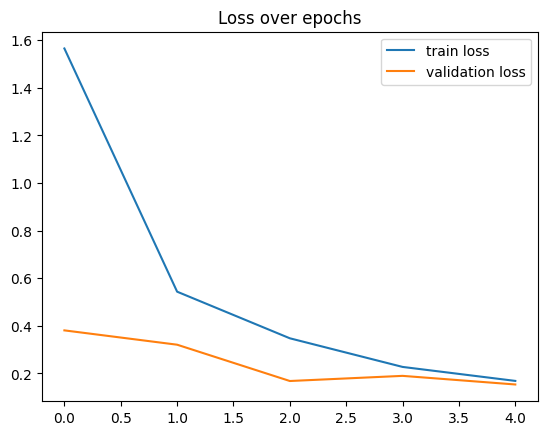

In [24]:
#Visualise
plt.plot(train_losses,label="train loss")
plt.plot(val_losses,label="validation loss")
plt.legend()
plt.title("Loss over epochs")
plt.show()


In [25]:
from PIL import Image
def preprocess_image(image_path,transform):
    image = Image.open(image_path).convert("RGB")
    return image, transform(image).unsqueeze(0)

def predict(model,image_tensor,device):
    model.eval()
    with torch.no_grad():
        image_tensor = image_tensor.to(device)
        outputs = model(image_tensor)
        probs = torch.nn.functional.softmax(outputs,dim =1)
    return probs.cpu().numpy().flatten()

def visualize_preds(original_image,probabilities,class_names):
    #Display image
    fig,ax = plt.subplots(1,2, figsize = (14,7))
    ax[0].imshow(original_image)
    ax[0].axis("off")

    #Display Predictions
    ax[1].barh(class_names,probabilities)
    ax[1].set_xlabel("Probability")
    ax[1].set_title('Class predictions')
    ax[1].set_xlim(0,1)
    plt.tight_layout
    plt.show()


    

    

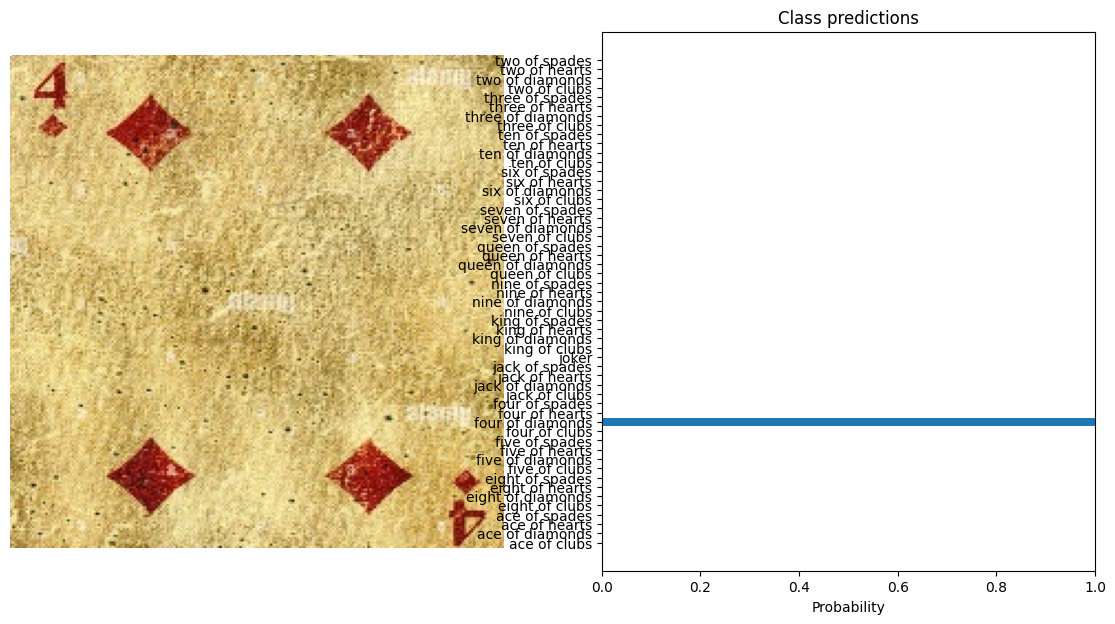

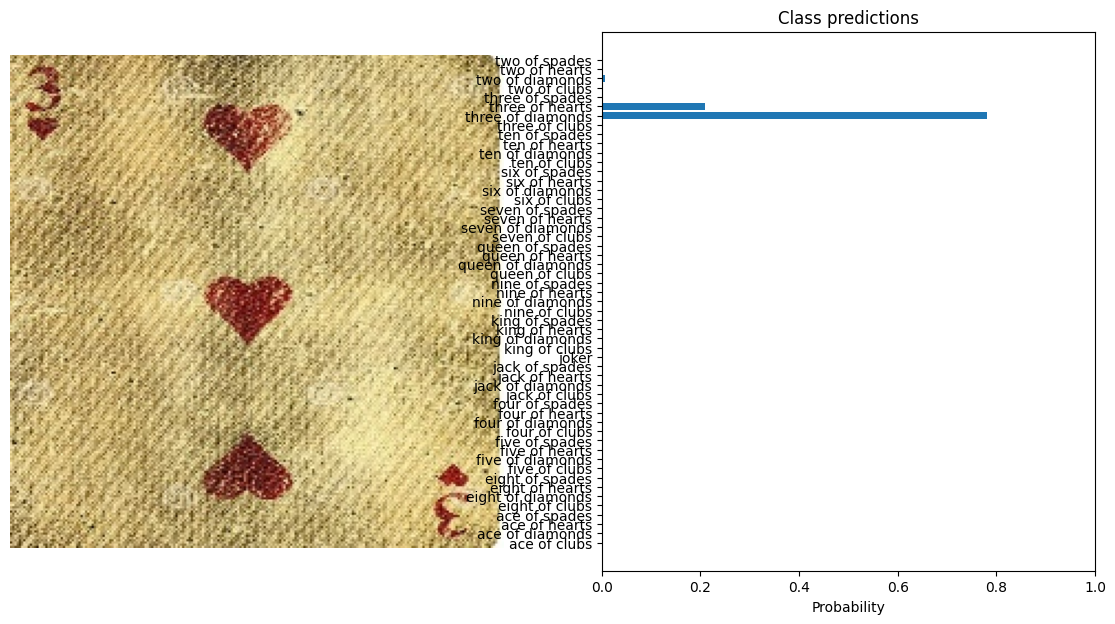

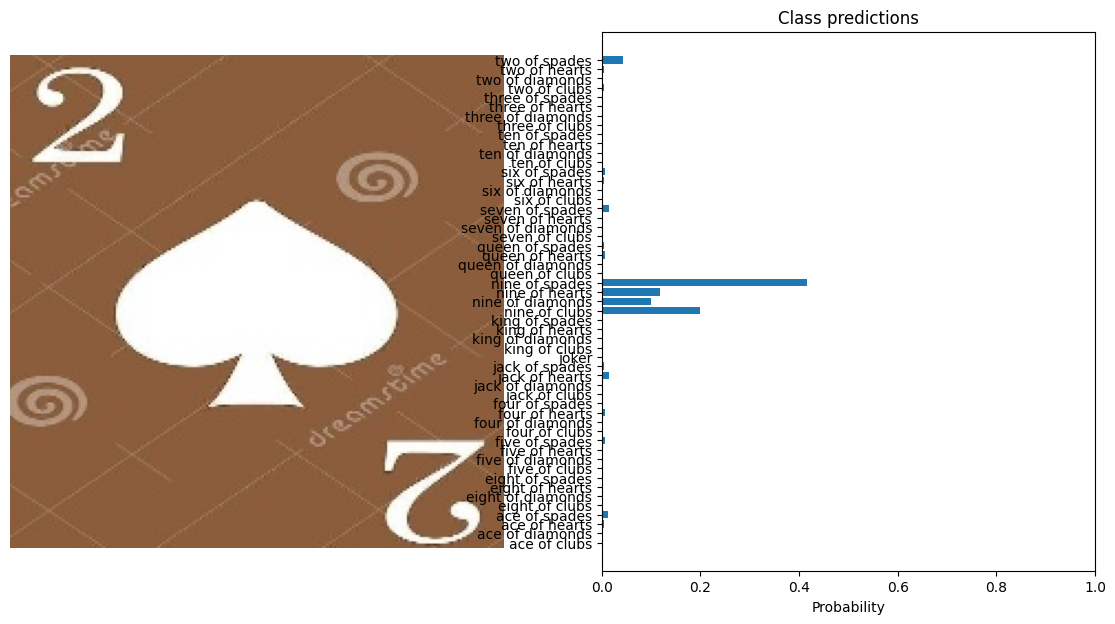

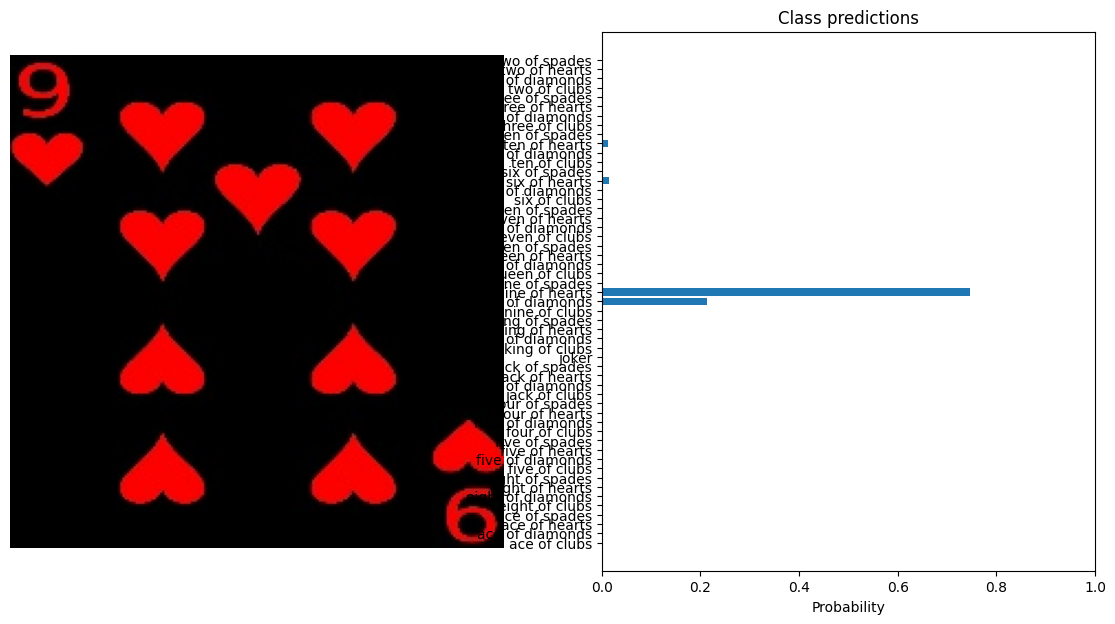

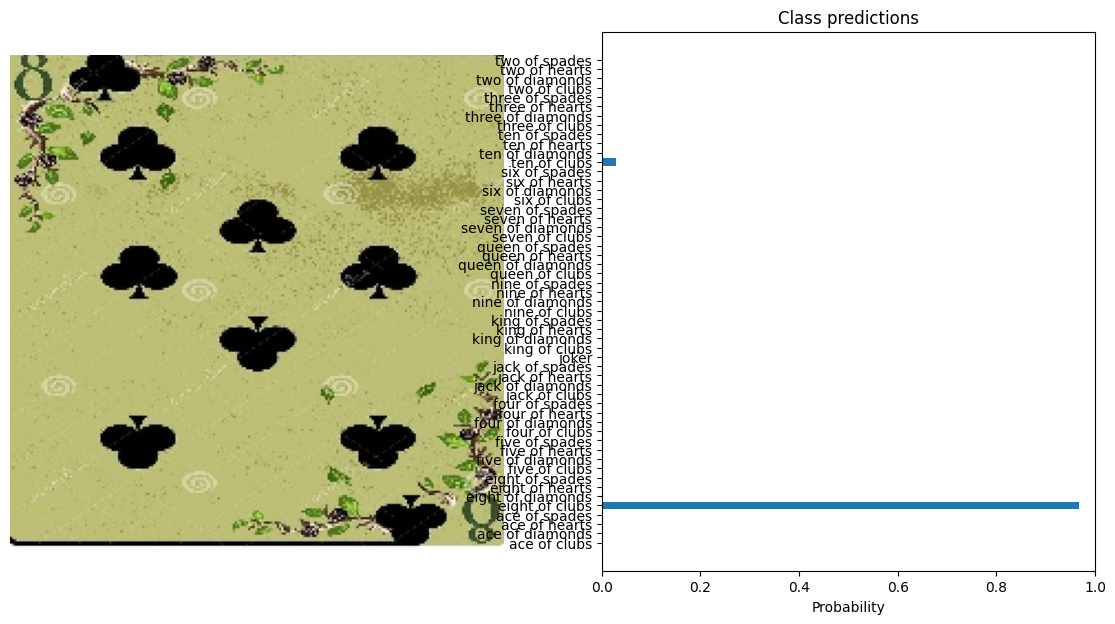

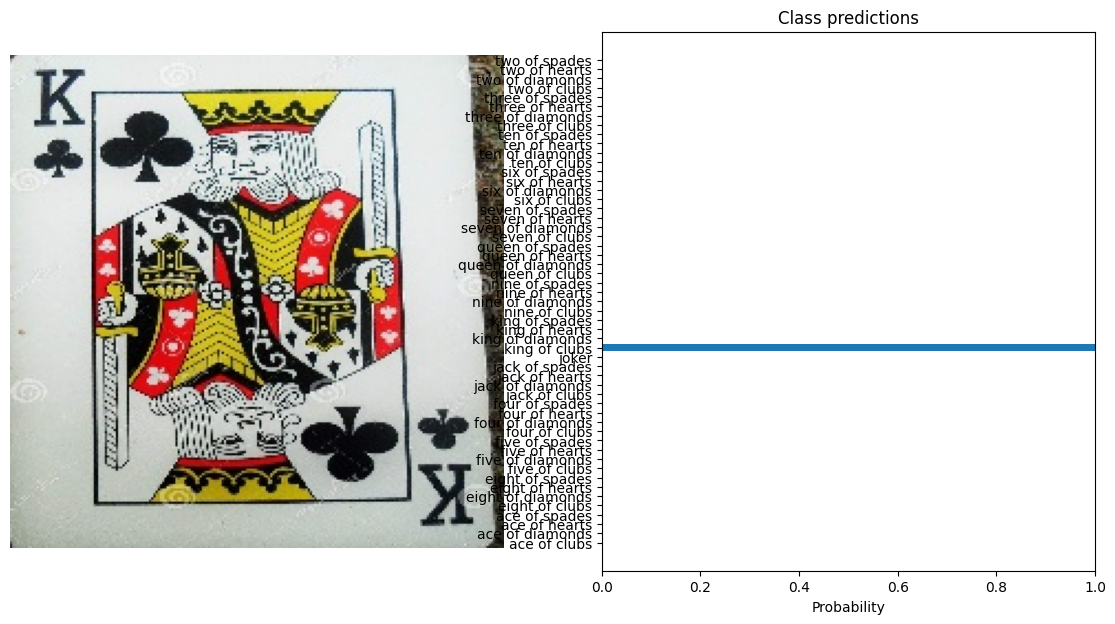

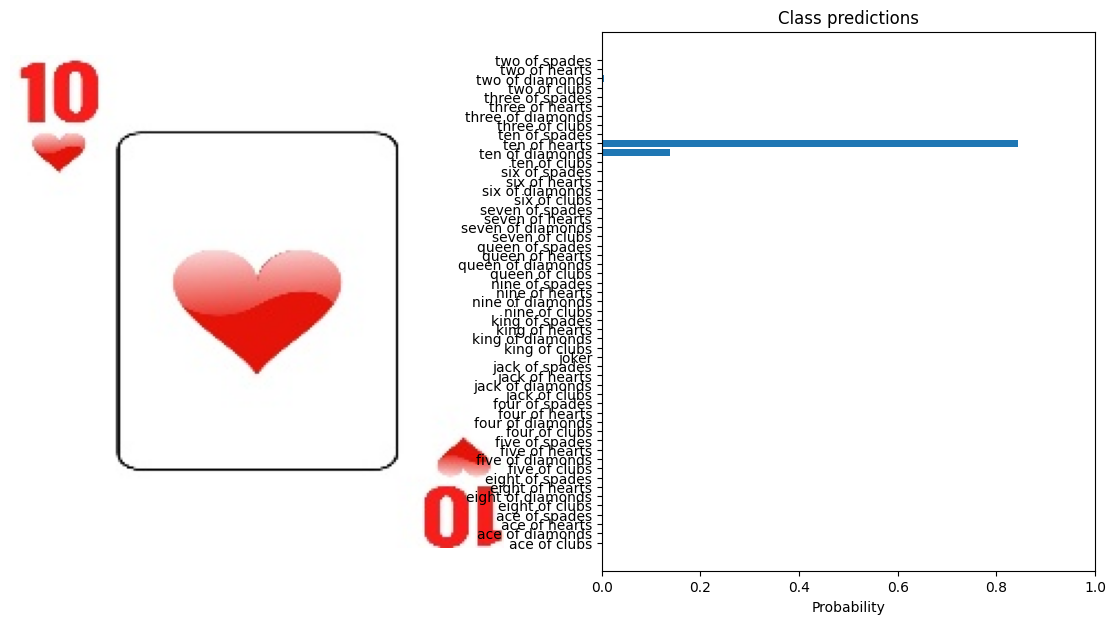

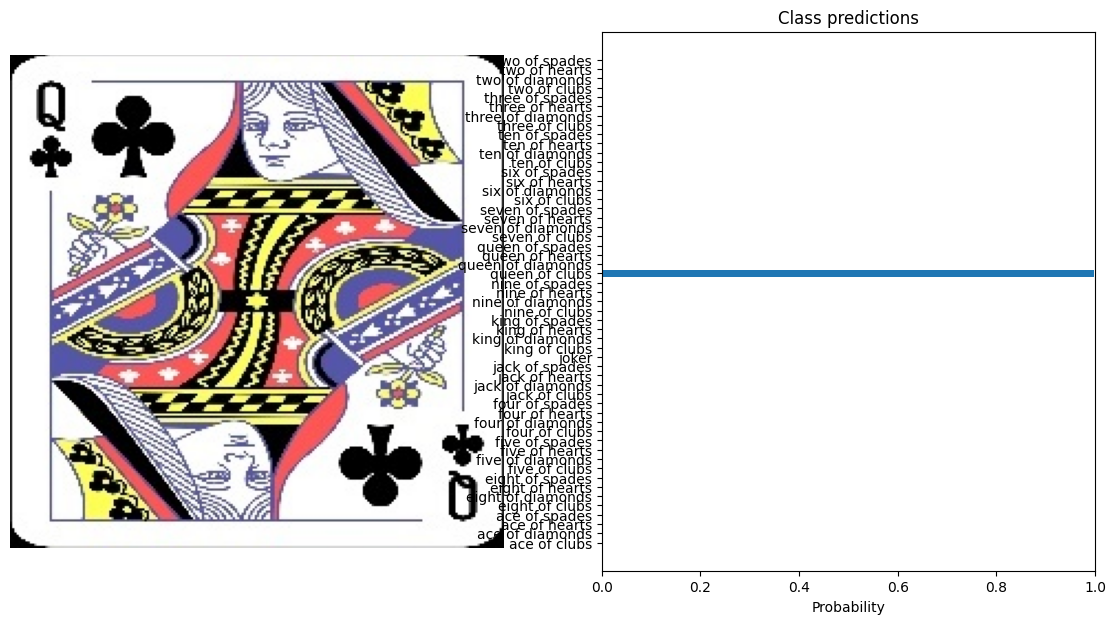

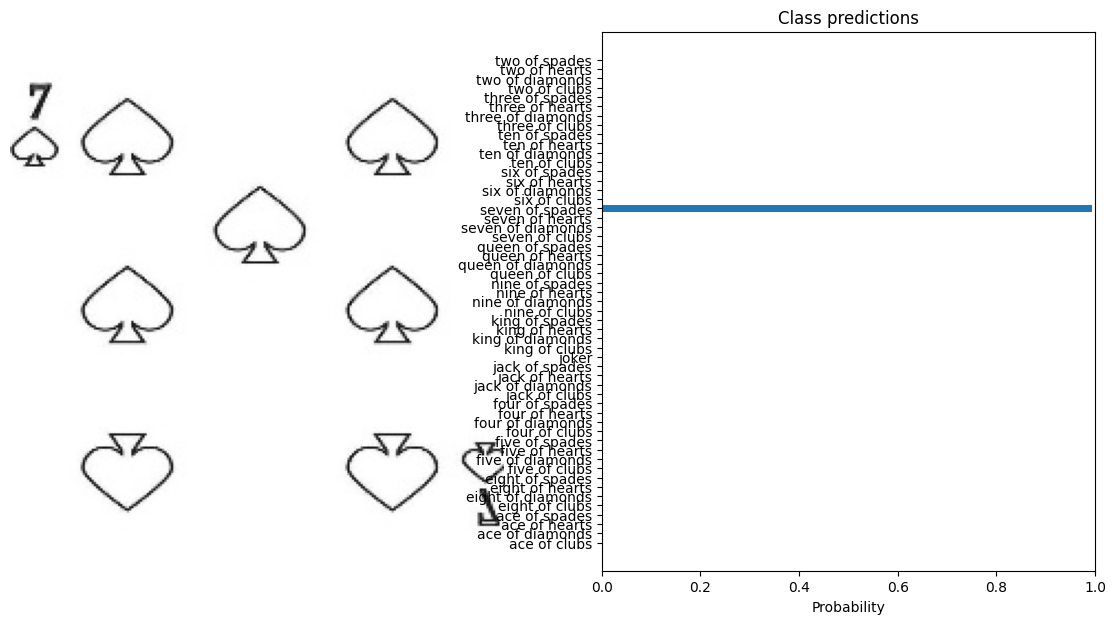

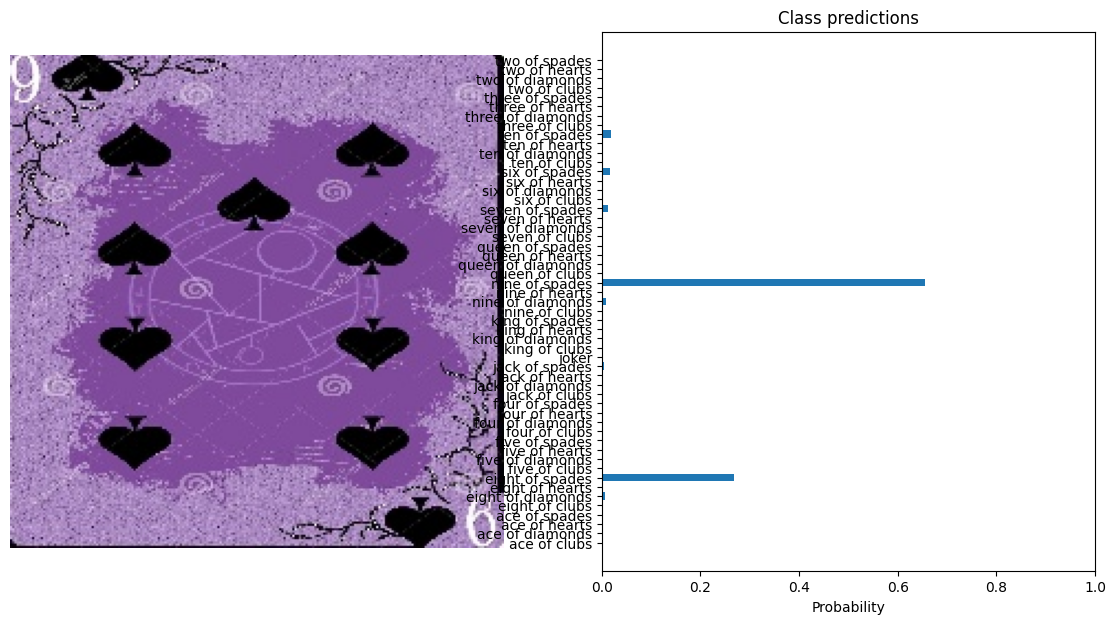

In [26]:
from glob import glob
test_imgs = glob(Dir+'/test/*/*')
test_samples = np.random.choice(test_imgs,10)
for item in test_samples:
    img,img_tensor = preprocess_image(item,transform)
    probs = predict(model,img_tensor,device)
    class_names = dataset.classes()
    
    visualize_preds(img,probs,class_names)

In [29]:
model.eval()
correct = 0
total = 0
    
with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            
            outputs = model(images)
            
            _, predicted = torch.max(outputs.data, 1)
            
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
accuracy = correct / total
print("Accuracy : {}% ".format(round(accuracy*100,3)))


Accuracy : 95.849% 
